In [1]:
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Load the dataset
movies_data = pd.read_csv('C:\\Users\\qccs\\Downloads\\movies.csv')

# Display basic info
print("Dataset Shape:", movies_data.shape)
movies_data.info()

# Selected important features
selected_features = ['genres', 'keywords', 'tagline', 'cast', 'director']

# Fill missing values
for feature in selected_features:
    movies_data[feature] = movies_data[feature].fillna('')

# Combine features into one column
movies_data['combined_features'] = movies_data['genres'] + ' ' + \
                                   movies_data['keywords'] + ' ' + \
                                   movies_data['tagline'] + ' ' + \
                                   movies_data['cast'] + ' ' + \
                                   movies_data['director']


Dataset Shape: (4803, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64


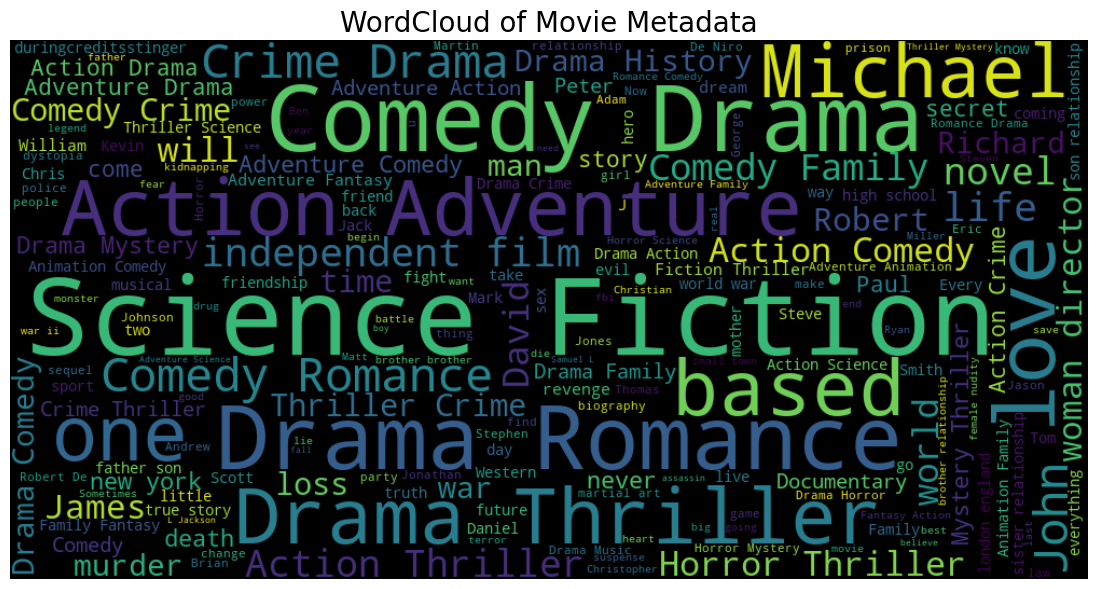

In [3]:
text = ' '.join(movies_data['combined_features'])
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Movie Metadata", fontsize=20)
plt.show()


C:\Users\qccs\AppData\Local\Temp\ipykernel_15668\1830585968.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Genre', x='Count', palette='viridis')


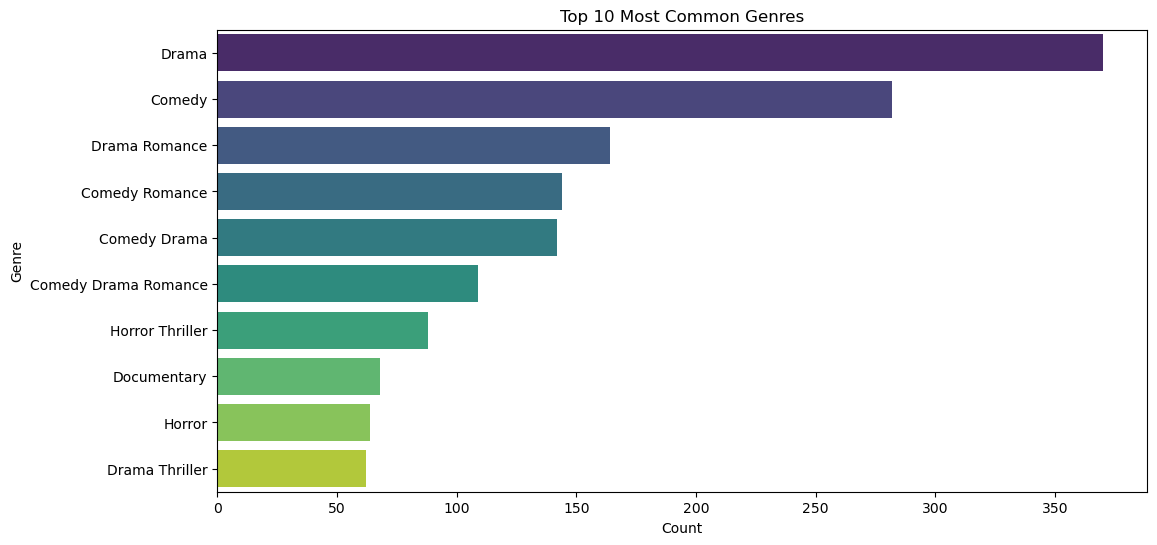

In [4]:
# Count top genres
all_genres = ','.join(movies_data['genres']).replace('|', ',').split(',')
genre_series = pd.Series(all_genres)
top_genres = genre_series.value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']

# Plotting the top genres
plt.figure(figsize=(12,6))
sns.barplot(data=top_genres, y='Genre', x='Count', palette='viridis')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [5]:
# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
feature_vectors = vectorizer.fit_transform(movies_data['combined_features'])

# Calculate cosine similarity
similarity = cosine_similarity(feature_vectors)

# Reset index for lookup
movies_data = movies_data.reset_index()
title_list = movies_data['title'].tolist()


In [6]:
def get_recommendations(movie_name, genre_filter=None, top_n=5):
    matches = difflib.get_close_matches(movie_name, title_list, n=1, cutoff=0.6)
    
    if not matches:
        print("❌ Movie not found. Try again with a correct name.")
        return
    
    close_match = matches[0]
    print(f"\n✅ Closest match: {close_match}")
    
    movie_index = movies_data[movies_data['title'] == close_match]['index'].values[0]
    
    # Show tagline/overview
    print("\n📄 Movie Overview:")
    print(movies_data.loc[movie_index, 'tagline'])

    similarity_scores = list(enumerate(similarity[movie_index]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:]

    print(f"\n🎬 Top {top_n} Recommendations:\n")
    count = 0
    for index, score in sorted_scores:
        title = movies_data.iloc[index]['title']
        genre = movies_data.iloc[index]['genres']
        if genre_filter:
            if genre_filter.lower() in genre.lower():
                print(f"{count+1}. {title} | Genre: {genre}")
                count += 1
        else:
            print(f"{count+1}. {title} | Genre: {genre}")
            count += 1
        if count >= top_n:
            break


In [8]:
user_movie = input("🎥 Enter a movie you like: ")
user_genre = input("🎭 (Optional) Filter by genre (press Enter to skip): ").strip()

get_recommendations(user_movie, genre_filter=user_genre if user_genre else None)


🎥 Enter a movie you like:  Avengers
🎭 (Optional) Filter by genre (press Enter to skip):  



✅ Closest match: The Avengers

📄 Movie Overview:
Some assembly required.

🎬 Top 5 Recommendations:

1. Avengers: Age of Ultron | Genre: Action Adventure Science Fiction
2. Captain America: The Winter Soldier | Genre: Action Adventure Science Fiction
3. Captain America: Civil War | Genre: Adventure Action Science Fiction
4. Iron Man 2 | Genre: Adventure Action Science Fiction
5. Thor: The Dark World | Genre: Action Adventure Fantasy
